In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as axis
from datetime import datetime

In [2]:
#Load data set into python
data_user = pd.read_csv('takehome_users.csv', parse_dates =[1], encoding = 'ISO-8859-1')
data_engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates =[0])

In [3]:
#Observe top rows in user data
data_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
#Observe top rows in engagement data
data_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
#Find all of the user_ids that are considered 'adopted' users
rolling_time = data_engagement.groupby('user_id').resample('D', on = 'time_stamp').mean()
rolling_time = rolling_time.drop('user_id', axis = 1)
rolling_time[rolling_time.isna()] = 0
rolling_time = rolling_time.reset_index(level = 'time_stamp')
rolling_time.head(10)

,time_stamp,visited
user_id,,
1,2014-04-22,1.0
2,2013-11-15,1.0
2,2013-11-16,0.0
2,2013-11-17,0.0
2,2013-11-18,0.0
2,2013-11-19,0.0
2,2013-11-20,0.0
2,2013-11-21,0.0
2,2013-11-22,0.0


In [6]:
print(len(rolling_time.index.unique()))

8823


In [7]:
#rolling_time = rolling_time.reset_index(level = 'time_stamp', drop = False)
num_user = len(rolling_time.index.unique())

temp_vec = pd.Series(np.zeros(2))
adopt_df = pd.DataFrame(np.zeros((num_user,2)), columns = ['user_id', 'adopt'])
count = 0

for indx in rolling_time.index.unique():
    temp = 0
    temp_vec = rolling_time.loc[indx].visited
    temp_vec = pd.Series(temp_vec)
    
    if(len(temp_vec) <= 7):
        temp = temp_vec.sum()
    else:
        temp = temp_vec.rolling(window = 7).sum().max()
        
    adopt_df.iloc[count].user_id =  indx
    if (temp >= 3):
        adopt_df.iloc[count].adopt = 1
    else:
        adopt_df.iloc[count].adopt = 0
    count += 1

In [8]:
#Look at the apot_df 
adopt_df.user_id = adopt_df.user_id.astype('int')

In [11]:
#Convert features in user data into usable numerica data for the email address type
temp_vec = pd.Series(np.zeros(len(data_user.email)))
temp = 0
count = 0

for indx in data_user.email:
    temp = indx.find('@')
    temp_vec[count] = indx[temp+1:len(indx)]
    count += 1

temp_unique = temp_vec.unique()
temp_df = pd.DataFrame()
temp_df['num'] = pd.Series(range(len(temp_unique)))
temp_df['email'] = pd.Series(temp_unique)
temp_df = temp_df.set_index('email')
data_user['email_type'] = pd.DataFrame(np.empty((len(data_user.email),1)))

count = 0
for indx in data_user.email:
    temp = indx.find('@')
    data_user['email_type'].iloc[count]  = temp_df.loc[indx[temp+1:len(indx)]].num
    count += 1

C:\Users\jjjon\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [184]:
len(data_user.email_type.unique())

1184

In [13]:
#Conver creation source into numerical value
temp_unique = data_user.creation_source.unique()
temp_df = pd.DataFrame()
temp_df['num'] = pd.Series(range(len(temp_unique)))
temp_df['creation_source'] = pd.Series(temp_unique)
temp_df = temp_df.set_index('creation_source')
data_user['creation_source_num'] = pd.DataFrame(np.empty((len(data_user.creation_source),1)))

count = 0
for indx in data_user.creation_source:
    data_user['creation_source_num'].iloc[count]  = temp_df.loc[indx].num
    count += 1

C:\Users\jjjon\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
data_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_type,creation_source_num,creation_year,creation_month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,1.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0.0,2013,1


In [20]:
#Alter creation time to account for year and month for as new data features
data_user['creation_year'] = data_user.creation_time.dt.year
data_user['creation_month'] = data_user.creation_time.dt.month

8823

In [22]:
#Merge data to using adoption data frame.
merged_df = data_user.merge(adopt_df, left_on = 'object_id', right_on = 'user_id')

In [23]:
merged_df['counter'] = 1
merged_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 16 columns):
object_id                     8823 non-null int64
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
email_type                    8823 non-null float64
creation_source_num           8823 non-null float64
creation_year                 8823 non-null int64
creation_month                8823 non-null int64
user_id                       8823 non-null int32
adopt                         8823 non-null float64
dtypes: datetime64[ns](1), float64(5), int32(1), int64(6), object(3)
me

In [218]:
#Create datasets for modeling
X = merged_df.drop(['object_id', 'creation_time', 'name', 'email',\
                    'creation_source', 'invited_by_user_id', 'adopt',\
                    'counter', 'user_id'],axis = 1)

y = merged_df.adopt

In [219]:
#Split the data into a training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
       train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#Chose predictive model from several choices.  Classification algorithm
#therefore several choice could be chosen.  Look at top types of classification
#algorithms.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

param_rf = {'n_estimators': [20, 40, 80, 160],
            'max_depth': [4, 6, 8],
             'n_jobs':[4]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_rf, cv = 5, refit = True)
rf_model = rf_cv.fit(X_train, y_train)


param_gb = {'booster': ['gbtree'],
          'learning_rate': [0.01, 0.1, 0.3],
          'max_depth': [4, 6, 8],
           'n_estimators': [50, 100, 200],
          'n_jobs': [4]}

gb = XGBClassifier()
gb_cv = GridSearchCV(gb, param_gb, cv = 5, refit = True)
gb_model = gb_cv.fit(X_train, y_train)

In [209]:
#Determine best fit parameters and run models new parameters
print('Random Forest best score : %.3f'%(rf_cv.best_score_))
print('Random Forest best params : ', rf_cv.best_params_)

print('XGBoost best score : %.3f'%(gb_cv.best_score_))
print('XGBoost best params : ', gb_cv.best_params_)

Random Forest best score : 0.821
Random Forest best params :  {'max_depth': 4, 'n_estimators': 40, 'n_jobs': 4}
XGBoost best score : 0.821
XGBoost best params :  {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'n_jobs': 4}


In [210]:
#rf_param_best = rf_cv.best_params_
#gb_param_best = rf_cv.best_params_
rf_param_best = {'max_depth': 6, 'n_estimators': 20, 'n_jobs': 4}
gb_param_best = {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 4,\
                 'n_estimators': 100, 'n_jobs': 4}
rf = RandomForestClassifier(**rf_param_best)
gb = XGBClassifier(**gb_param_best)

rf_model = rf.fit(X_train, y_train)
gb_model = gb.fit(X_train, y_train)

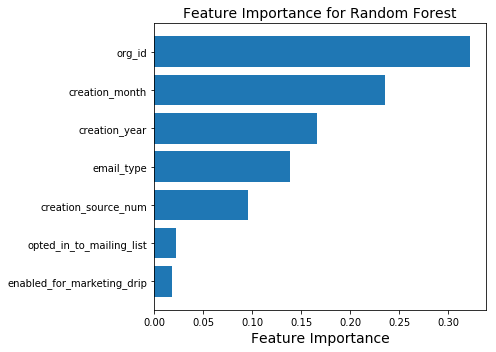

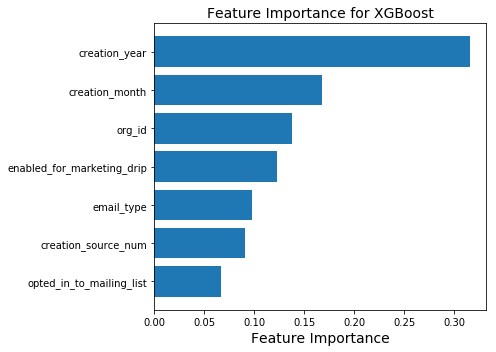

In [211]:
#Display feature importance
def feature_imp_plot(model_name, model, X_train):
    features = X_train.columns
    feat_imp = model.feature_importances_
    feat = pd.DataFrame()
    feat['feature'] = features
    feat['importance'] = feat_imp
    feat = feat.sort_values('importance')

    wide = np.arange(len(feat_imp))
    plt.figure(figsize = (7,5))
    plt.barh(wide, feat['importance'])
    plt.yticks(wide, feat['feature'])
    plt.xlabel('Feature Importance', fontsize = 14)
    plt.title('Feature Importance for '+model_name, fontsize = 14)
    plt.tight_layout()
    plt.savefig('FeatureImportance_embed_av.png', bbox = 'tight')
    plt.savefig('./Figures/FeatImp_'+model_name+'.png', bbox_inches = 'tight')
    plt.show()
    
feature_imp_plot('Random Forest', rf, X_train)
feature_imp_plot('XGBoost', gb, X_train)

In [212]:
from sklearn.metrics import accuracy_score
#Look at the result of create model ensemble on accuracy
rf_prob = rf.predict_proba(X_test)
gb_prob = gb.predict_proba(X_test)

rf_y = [round(value[1]) for value in rf_prob]
gb_y = [round(value[1]) for value in gb_prob]

#Find the maximum accuracy for ensemble weights
rf_accuracy = accuracy_score(y_test, rf_y)
gb_accuracy = accuracy_score(y_test, gb_y)

print('Random Forest Accuracy %.3f'%(rf_accuracy))
print('XGBoost Accuracy %.3f'%(gb_accuracy))

Random Forest Accuracy 0.813
XGBoost Accuracy 0.813


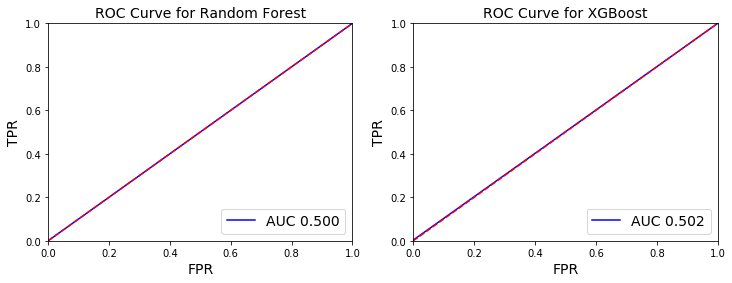

In [213]:
#Calculate ROC and AUC values for each model
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(model_name, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    plt.plot(fpr, tpr, color = 'blue')
    plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
    plt.xlabel('FPR', fontsize = 14)
    plt.ylabel('TPR', fontsize = 14)
    plt.title('ROC Curve for '+model_name, fontsize = 14)
    plt.axis([0, 1, 0, 1])
    plt.legend(['AUC %.3f'%auc], loc = 'lower right', fontsize = 14)

plt.figure(figsize=(12,4))
plt.subplot(121); plot_roc('Random Forest', rf_y)
plt.subplot(122); plot_roc('XGBoost', gb_y)
plt.savefig('./Figures/ROC_rf_gb.png', bbox_inches = 'tight')
plt.show()

In [214]:
#Calculate histograms of adoption data for different features


create_year_hist_total = merged_df.groupby('creation_year').sum().counter
create_month_hist_total = merged_df.groupby('creation_month').sum().counter
creation_source_hist_total = merged_df.groupby('creation_source_num').sum().counter
marketing_hist_total = merged_df.groupby('enabled_for_marketing_drip').sum().counter
mailing_hist_total = merged_df.groupby('opted_in_to_mailing_list').sum().counter
org_hist_total = merged_df.groupby('org_id').sum().counter


create_year_hist = merged_df.groupby('creation_year').sum().adopt
create_month_hist = merged_df.groupby('creation_month').sum().adopt
creation_source_hist = merged_df.groupby('creation_source_num').sum().adopt
mailing_hist = merged_df.groupby('opted_in_to_mailing_list').sum().adopt
org_hist = merged_df.groupby('org_id').sum().adopt

last_min = merged_df.last_session_creation_time.min()
last_max = merged_df.last_session_creation_time.max()
last_session = pd.DataFrame(np.zeros((10,3)), columns = ['last_session', 'count', 'total'])
last_session.last_session = pd.Series(np.linspace(last_min, last_max, 10))
last_session = last_session.set_index('last_session')


for indx in range(len(merged_df.last_session_creation_time)):
    temp = merged_df.iloc[indx].last_session_creation_time
    temp2 = np.abs(last_session.index.values-temp)
    
    last_session.iloc[np.argmin(temp2)]['count'] += merged_df.iloc[indx].adopt
    last_session.iloc[np.argmin(temp2)]['total'] += 1

In [215]:
last_session['last_session2'] = pd.Series(datetime.fromtimestamp(last_session.index.astype('int')[1]))
count = 0
for indx in last_session.index:
    last_session['last_session2'][count] =\
        datetime.fromtimestamp(last_session.index.astype('int')[count]).date()
    count += 1


C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


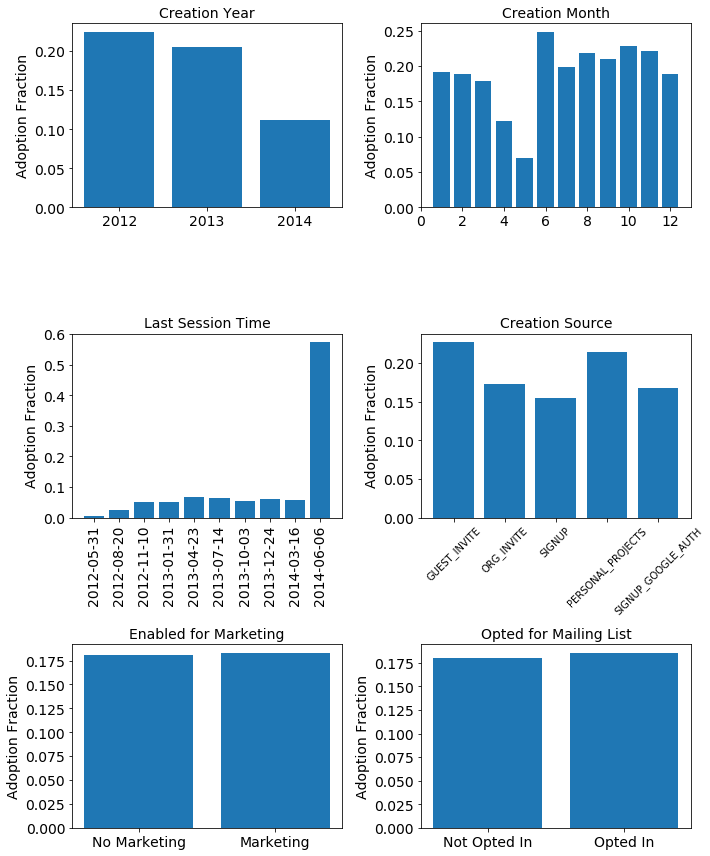

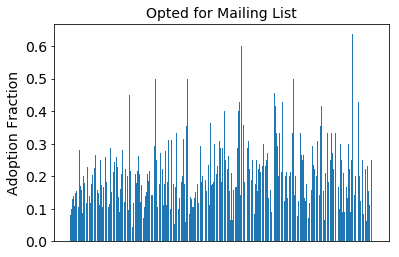

In [217]:
#Plot histograms of different features with the adoption fraction shown

plt.figure(figsize=(10,12))

frac_last_session = last_session['count']/last_session['total']
frac_create_year = create_year_hist/create_year_hist_total
frac_create_month = create_month_hist/create_month_hist_total
frac_source = creation_source_hist/creation_source_hist_total
frac_marketing = marketing_hist/marketing_hist_total
frac_mailing = mailing_hist/mailing_hist_total
frac_org = org_hist/org_hist_total

plt.subplot(321); plt.bar(frac_create_year.index, frac_create_year)
plt.title('Creation Year', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks((2012, 2013, 2014), ('2012', '2013', '2014'),fontsize = 14)

plt.subplot(322); plt.bar(frac_create_month.index, frac_create_month)
plt.title('Creation Month', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(323); plt.bar(last_session.last_session2.astype('str'), frac_last_session)
plt.title('Last Session Time', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)

plt.subplot(324); plt.bar(temp_unique, frac_source)
plt.title('Creation Source', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(rotation = 45, fontsize = 10)

plt.subplot(325); plt.bar(['No Marketing', 'Marketing'], frac_marketing)
plt.title('Enabled for Marketing', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.subplot(326); plt.bar(['Not Opted In', 'Opted In'], frac_mailing)
plt.title('Opted for Mailing List', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)


plt.tight_layout()
plt.savefig('./Figures/ApotionFrac_Hist.png')
plt.show()

plt.bar(frac_org.index, frac_org)
plt.title('Opted for Mailing List', fontsize = 14)
plt.ylabel('Adoption Fraction', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.tick_params(
    axis='x',  
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()